In [ ]:
#importing data to notes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('basketball_injury_biomechanical_dataset.csv')


In [ ]:
df.head()

,Player_ID,Age,Height_cm,Weight_kg,Position,Injury_Type,Injury_Severity,Rehabilitation_Program,Rehabilitation_Time_weeks,Injury_Recurrence,Date_of_Injury,Rehabilitation_Efficiency_Score,knee_angle_deg,jump_height_cm,ankle_flexion_deg,speed_m_s,reaction_time_ms
0,1,24,195,108,Center,ACL Tear,Severe,Physiotherapy,7,0,2017-12-19,0.862860,78.327638,77.705191,37.926663,56.578469,64.259747
1,2,32,183,87,Forward,Ankle Sprain,Mild,Physiotherapy,8,0,2017-08-10,0.806708,32.751850,83.215950,98.938884,71.320646,45.484661
2,3,28,208,109,Center,Knee Injury,Moderate,Flexibility Exercises,3,0,2018-11-21,0.709122,85.958728,71.694712,88.722866,48.764455,99.136761
3,4,25,196,70,Forward,Shoulder Dislocation,Moderate,Strength Training,11,0,2017-07-18,0.966364,73.953027,63.010333,38.726388,73.690424,96.084154
4,5,24,178,80,Guard,Shoulder Dislocation,Moderate,Balance Training,3,1,2015-03-05,0.933032,35.723132,58.828864,94.458932,58.658816,32.759877


In [ ]:
df.tail()

,Player_ID,Age,Height_cm,Weight_kg,Position,Injury_Type,Injury_Severity,Rehabilitation_Program,Rehabilitation_Time_weeks,Injury_Recurrence,Date_of_Injury,Rehabilitation_Efficiency_Score,knee_angle_deg,jump_height_cm,ankle_flexion_deg,speed_m_s,reaction_time_ms
95,96,32,189,100,Center,Knee Injury,Mild,Physiotherapy,6,0,2021-11-25,0.560318,34.436248,59.689147,59.499719,86.459280,99.643548
96,97,31,201,72,Forward,Ankle Sprain,Moderate,Flexibility Exercises,11,1,2018-02-19,0.730389,99.297216,81.551096,92.487020,76.114836,42.172667
97,98,20,176,109,Guard,Ankle Sprain,Severe,Strength Training,11,0,2014-11-15,0.603167,52.564769,95.405691,87.221049,78.459360,57.736941
98,99,18,202,93,Center,Shoulder Dislocation,Mild,Balance Training,6,0,2018-03-27,0.682135,86.691211,94.789796,53.927215,89.443696,83.076693
99,100,22,209,101,Forward,Ankle Sprain,Severe,Balance Training,8,0,2021-10-30,0.751709,47.824846,61.558756,48.159640,47.476761,78.721443


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Player_ID                        100 non-null    int64  
 1   Age                              100 non-null    int64  
 2   Height_cm                        100 non-null    int64  
 3   Weight_kg                        100 non-null    int64  
 4   Position                         100 non-null    object 
 5   Injury_Type                      100 non-null    object 
 6   Injury_Severity                  100 non-null    object 
 7   Rehabilitation_Program           100 non-null    object 
 8   Rehabilitation_Time_weeks        100 non-null    int64  
 9   Injury_Recurrence                100 non-null    int64  
 10  Date_of_Injury                   100 non-null    object 
 11  Rehabilitation_Efficiency_Score  100 non-null    float64
 12  knee_angle_deg         

In [ ]:
df.info
print(df.nunique())

Player_ID                          100
Age                                 17
Height_cm                           35
Weight_kg                           37
Position                             3
Injury_Type                          5
Injury_Severity                      3
Rehabilitation_Program               4
Rehabilitation_Time_weeks           10
Injury_Recurrence                    2
Date_of_Injury                      98
Rehabilitation_Efficiency_Score    100
knee_angle_deg                     100
jump_height_cm                     100
ankle_flexion_deg                  100
speed_m_s                          100
reaction_time_ms                   100
dtype: int64


In [ ]:
numerical_df = df.select_dtypes(include=[np.number])
numerical_df.head()

,Player_ID,Age,Height_cm,Weight_kg,Rehabilitation_Time_weeks,Injury_Recurrence,Rehabilitation_Efficiency_Score,knee_angle_deg,jump_height_cm,ankle_flexion_deg,speed_m_s,reaction_time_ms
0,1,24,195,108,7,0,0.862860,78.327638,77.705191,37.926663,56.578469,64.259747
1,2,32,183,87,8,0,0.806708,32.751850,83.215950,98.938884,71.320646,45.484661
2,3,28,208,109,3,0,0.709122,85.958728,71.694712,88.722866,48.764455,99.136761
3,4,25,196,70,11,0,0.966364,73.953027,63.010333,38.726388,73.690424,96.084154
4,5,24,178,80,3,1,0.933032,35.723132,58.828864,94.458932,58.658816,32.759877


**NORMALITY TEST**

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

data =  stats.norm(scale=1, loc=0).rvs(1000)
from scipy.stats import shapiro
shapiro(data)

ShapiroResult(statistic=0.9989203404915359, pvalue=0.8293696432964532)

**LINEAR REGRESSION**

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('basketball_injury_biomechanical_dataset.csv')



knee_angle = df[['knee_angle_deg']]
jump_height = df[['jump_height_cm']]


x = knee_angle['knee_angle_deg']
y = jump_height['jump_height_cm']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

print(lin_reg.intercept_)
print(lin_reg.coef_)


y_pred = lin_reg.predict(x_test)
y_pred

60.519570475176394
[0.11546635]


array([68.08639515, 68.87982342, 70.9791473 , 67.47251157, 70.00868316,
       70.36215146, 71.21919951, 65.49536906, 70.03147796, 69.56377686,
       70.02510276, 67.03301469, 65.36478455, 65.69262   , 67.87244531,
       64.64439013, 68.48367744, 68.60370307, 65.67565709, 64.1457893 ,
       64.80623248, 68.68150282, 67.59983602, 68.32480214, 71.81944574,
       68.98069443, 68.01229201, 71.9850575 , 70.49979923, 66.06809779])

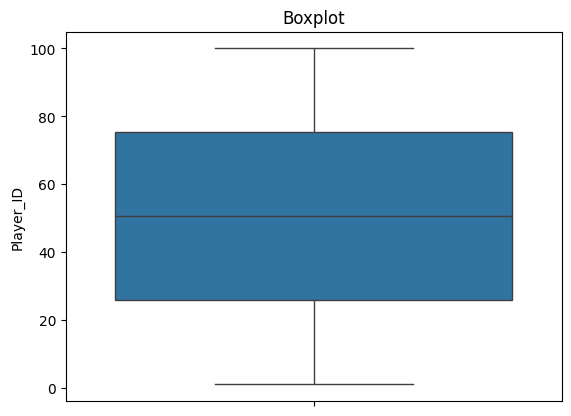

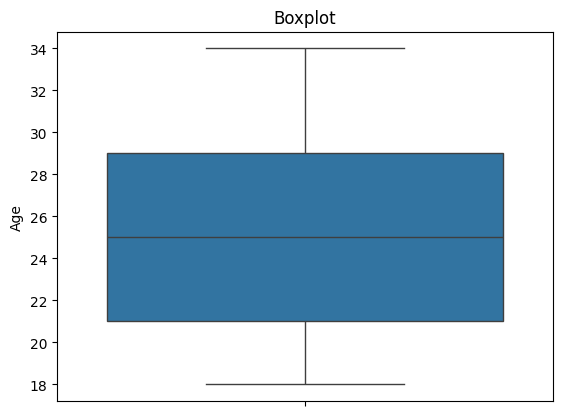

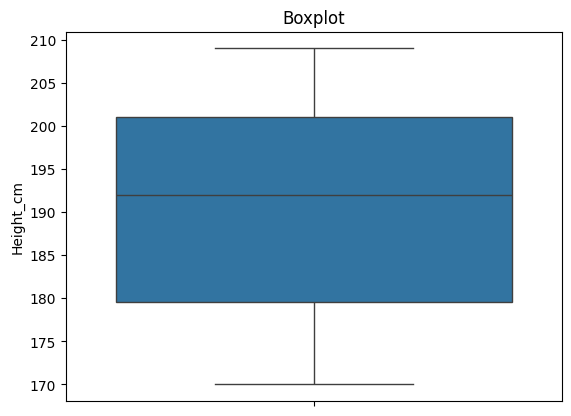

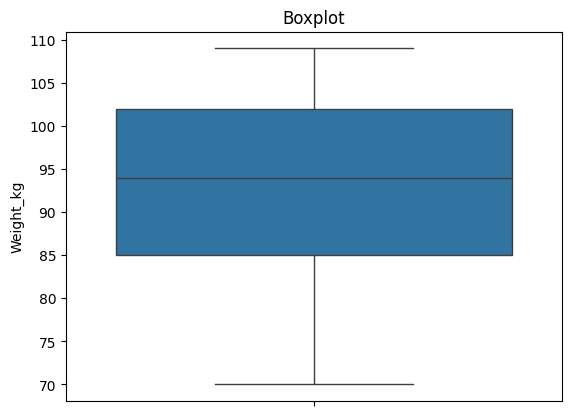

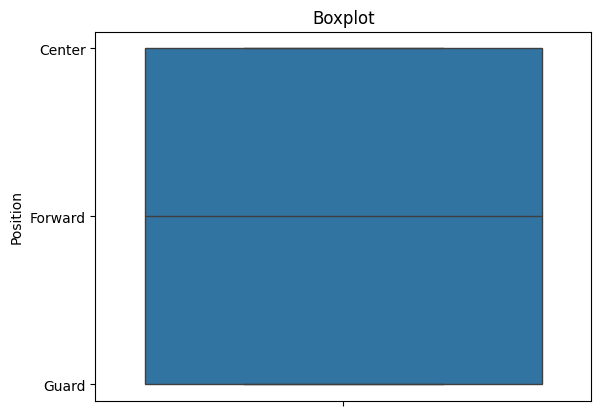

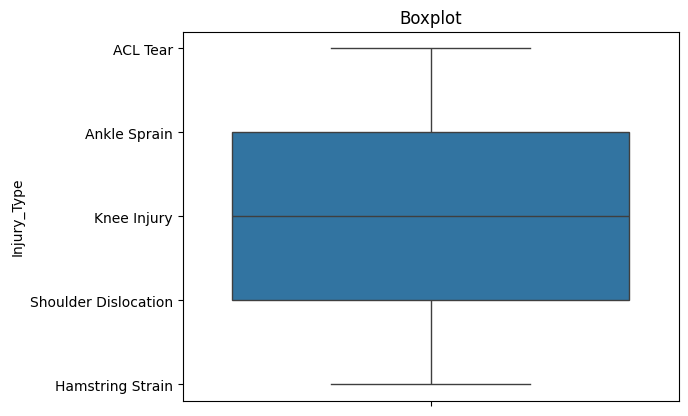

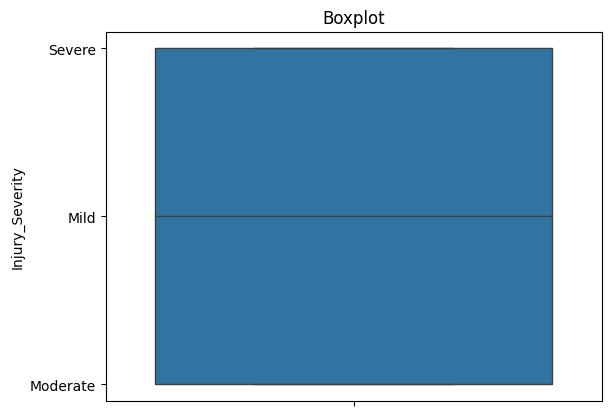

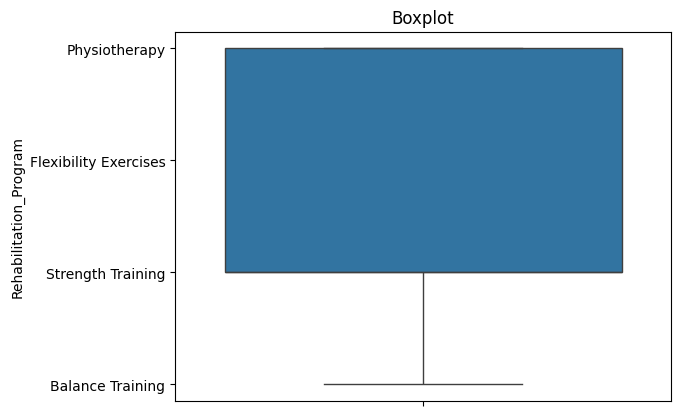

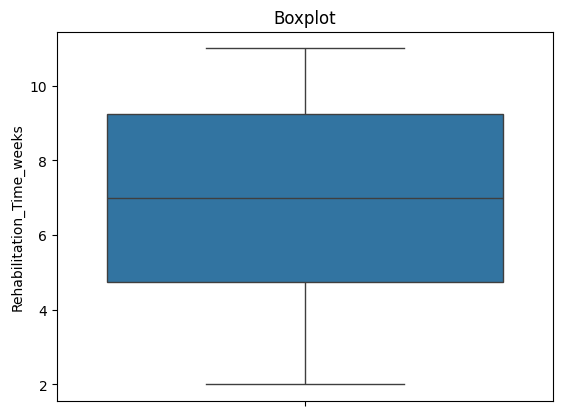

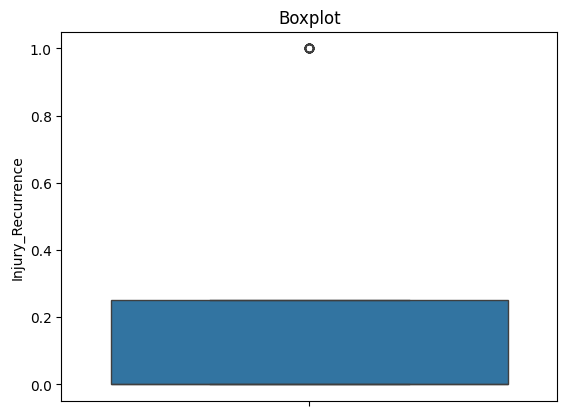

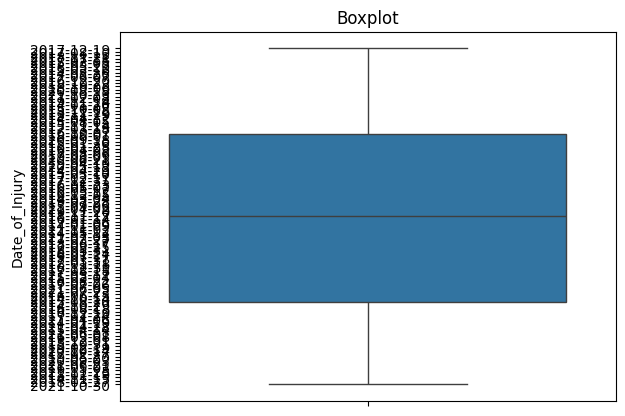

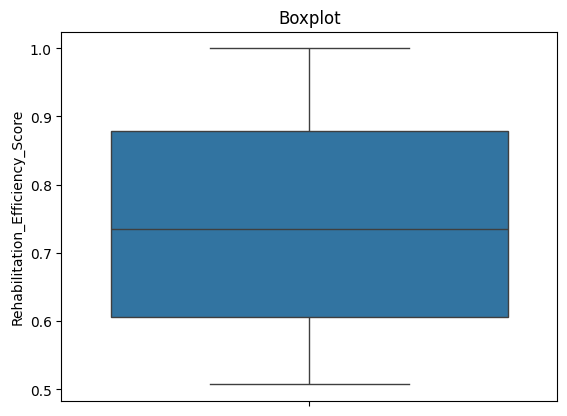

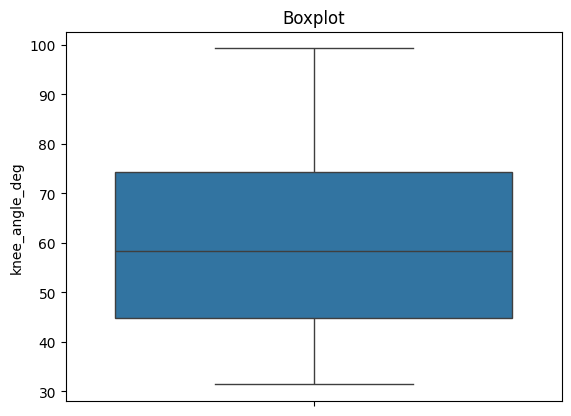

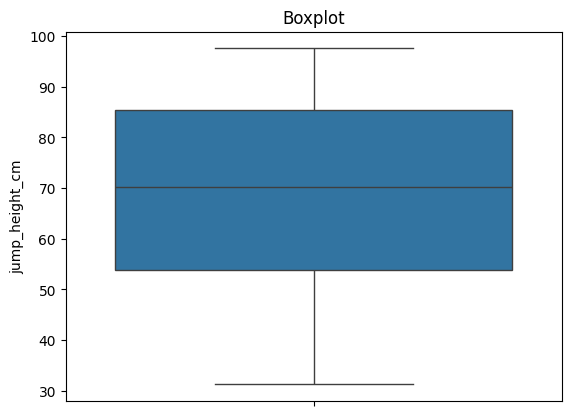

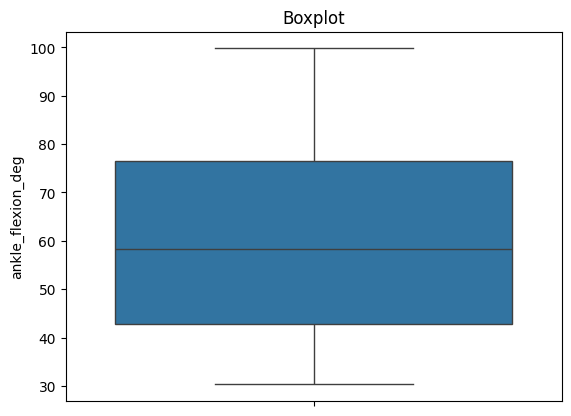

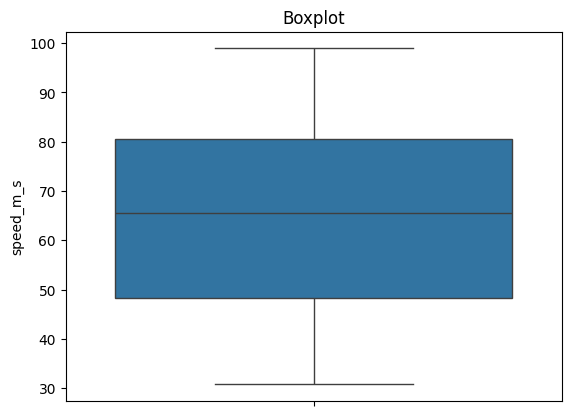

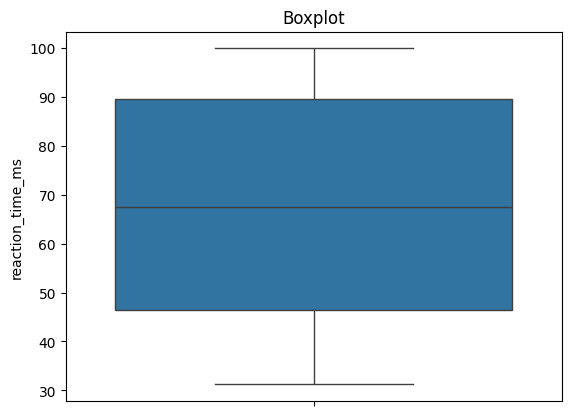

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('basketball_injury_biomechanical_dataset.csv')

def num_plot(df, var):
    plt.subplot
    sns.boxplot(y = df[var])
    plt.title("Boxplot")
    plt.show()

for var in df:
    num_plot(df, var)



<Axes: xlabel='reaction_time_ms', ylabel='jump_height_cm'>

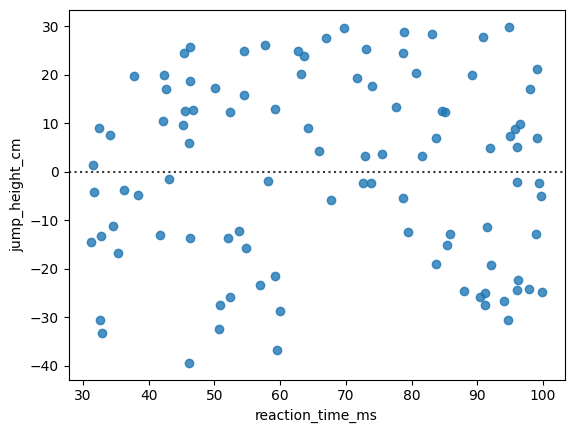

In [6]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl

df = pd.read_csv('basketball_injury_biomechanical_dataset.csv')


sns.residplot(x=df['reaction_time_ms'], y=df['jump_height_cm'])



<Axes: xlabel='reaction_time_ms', ylabel='ankle_flexion_deg'>

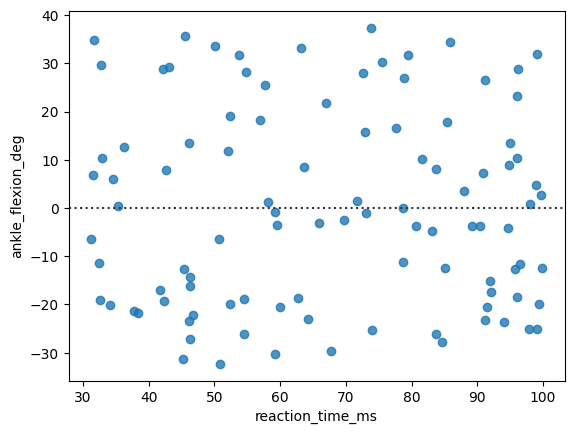

In [7]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl

df = pd.read_csv('basketball_injury_biomechanical_dataset.csv')


sns.residplot(x=df['reaction_time_ms'], y=df['ankle_flexion_deg'])


<Axes: xlabel='reaction_time_ms', ylabel='knee_angle_deg'>

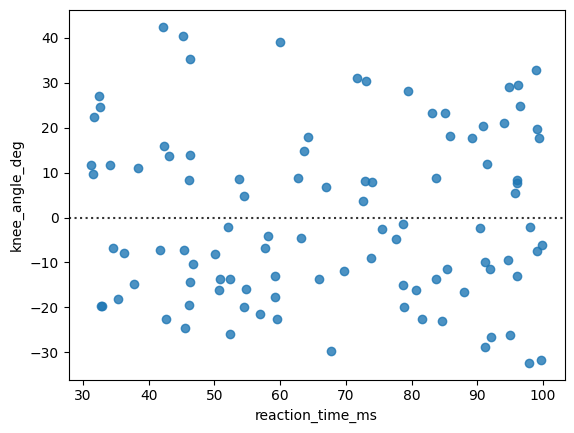

In [8]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl

df = pd.read_csv('basketball_injury_biomechanical_dataset.csv')


sns.residplot(x=df['reaction_time_ms'], y=df['knee_angle_deg'])

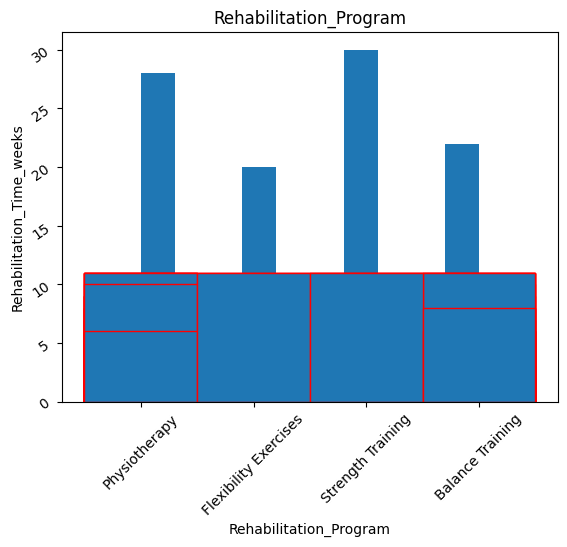

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('basketball_injury_biomechanical_dataset.csv')

x = df['Rehabilitation_Program']
y = df['Rehabilitation_Time_weeks']

fig, ax = plt.subplots()

plt.hist(x, bins=10)
ax.bar(x, y, width=1, edgecolor="red")
plt.xticks(rotation=45)
plt.yticks(rotation=35)
plt.xlabel('Rehabilitation_Program')
plt.ylabel('Rehabilitation_Time_weeks')
plt.title('Rehabilitation_Program')
plt.show()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('basketball_injury_biomechanical_dataset.csv')
df.head(15)

,Player_ID,Age,Height_cm,Weight_kg,Position,Injury_Type,Injury_Severity,Rehabilitation_Program,Rehabilitation_Time_weeks,Injury_Recurrence,Date_of_Injury,Rehabilitation_Efficiency_Score,knee_angle_deg,jump_height_cm,ankle_flexion_deg,speed_m_s,reaction_time_ms
0,1,24,195,108,Center,ACL Tear,Severe,Physiotherapy,7,0,2017-12-19,0.862860,78.327638,77.705191,37.926663,56.578469,64.259747
1,2,32,183,87,Forward,Ankle Sprain,Mild,Physiotherapy,8,0,2017-08-10,0.806708,32.751850,83.215950,98.938884,71.320646,45.484661
2,3,28,208,109,Center,Knee Injury,Moderate,Flexibility Exercises,3,0,2018-11-21,0.709122,85.958728,71.694712,88.722866,48.764455,99.136761
3,4,25,196,70,Forward,Shoulder Dislocation,Moderate,Strength Training,11,0,2017-07-18,0.966364,73.953027,63.010333,38.726388,73.690424,96.084154
4,5,24,178,80,Guard,Shoulder Dislocation,Moderate,Balance Training,3,1,2015-03-05,0.933032,35.723132,58.828864,94.458932,58.658816,32.759877
5,6,28,184,97,Guard,Ankle Sprain,Severe,Physiotherapy,11,1,2018-05-29,0.522609,91.150504,54.420779,90.892745,68.643303,79.390262
6,7,28,184,94,Guard,Knee Injury,Moderate,Physiotherapy,2,0,2015-03-16,0.513183,94.461068,95.067040,66.318664,60.528857,94.767382
7,8,21,195,92,Forward,Ankle Sprain,Mild,Physiotherapy,9,0,2014-05-26,0.688232,34.275457,88.143359,71.389281,50.612603,42.640274
8,9,25,182,100,Center,Ankle Sprain,Moderate,Balance Training,2,1,2017-06-07,0.905277,49.381435,97.551884,57.930189,96.391731,69.756166
9,10,20,201,99,Center,Shoulder Dislocation,Mild,Strength Training,10,0,2016-12-20,0.993638,86.434090,38.700806,33.833315,83.452406,94.084181


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('basketball_injury_biomechanical_dataset.csv')



In [7]:


import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model

data = pd.read_csv('basketball_injury_biomechanical_dataset.csv')

def angle_of_injury(df):
    return df['knee_angle_deg']

value = []
for i in range(len(data)):
    value.append(data['knee_angle_deg'][i])
    print(data)



Streaming output truncated to the last 5000 lines.
2         Moderate  Flexibility Exercises                          3   
3         Moderate      Strength Training                         11   
4         Moderate       Balance Training                          3   
..             ...                    ...                        ...   
95            Mild          Physiotherapy                          6   
96        Moderate  Flexibility Exercises                         11   
97          Severe      Strength Training                         11   
98            Mild       Balance Training                          6   
99          Severe       Balance Training                          8   

    Injury_Recurrence Date_of_Injury  Rehabilitation_Efficiency_Score  \
0                   0     2017-12-19                         0.862860   
1                   0     2017-08-10                         0.806708   
2                   0     2018-11-21                         0.709122   
3       

In [22]:
value = df['knee_angle_deg']

def average_ankle_flexion_injury():
    for i in range(len(df)):
        value.count(df['ankle_flexion_deg'][i]) / len(df)
        print(value)

    import matplotlib.pyplot as plt
    plt.hist(value)
    plt.show()